# Text preprocessing

In [1]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def preprocess_summary(text):
    """
    Tokenize, lemmatize, remove stopwords and punctuations from an input text.
    
    Parameters
    ----------
    text: str, input text
    
    Returns
    -------
    str, preprocessed text
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    
    tokens = nltk.word_tokenize(text)
    text = [word for word in tokens if word not in string.punctuation]
    
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in text if word.lower() not in stop_words])

In [3]:
"""
summaries: dictionary, with movie_id as keys and list of preprocessed words in the summary as values
"""
with open("./test_data/plot_summaries.txt", encoding='utf-8') as f:
    content = f.readlines()
original_summaries = [x.strip() for x in content] 
summaries = [preprocess_summary(d).split() for d in original_summaries]
summaries = {summary[0]: summary[1:] for summary in summaries}

In [4]:
original_summaries[2] # original

"20663735\tPoovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had earlier given jail sentence to Manapally in a corruption case. Induchoodan, who had achieved top rank in Indian Civil Service loses the post and Manapally Sudheeran ([[Saikumar  enters the list of civil service trainees. We learn in flashback that it was Ramakrishnan  the son of Moopil Nair , who had actually killed his classmate. Six years passes by and Manapally Madhavan Nambiar, now a former state minister, is dead and Induchoodan, who is all rage at the gross injustice meted out to him - thus destroying his promising life, is released from prison. Induchoodan thwarts Manapally Pavithran  from performing the funeral rituals of Nambiar at Bharathapuzha. Many confrontations between In

In [5]:
print(summaries['23890098']) # preprocessed

['shlykov', 'hard-working', 'taxi', 'driver', 'lyosha', 'saxophonist', 'develop', 'bizarre', 'love-hate', 'relationship', 'despite', 'prejudice', 'realize', "n't", 'different']


In [6]:
import pandas as pd

data = pd.read_table("NRC-lexicon/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages-withZeroIntensityEntries.txt")
data_filt = data.iloc[:,0:9].copy()

In [7]:
holder = pd.DataFrame(columns=data_filt.columns)
holder = holder.drop(columns = "English Word")
for key in summaries:
 test = pd.DataFrame(columns=data_filt.columns)
 for i in range(0,len(summaries[key])):
  selection = data_filt[data_filt["English Word"] == summaries[key][i]]
  test = pd.concat([test, selection], ignore_index=True)
 test["Movie ID"] = key
 test = test.drop(columns = "English Word")
 test = test.set_index("Movie ID")
 test = test.groupby("Movie ID").sum()
 holder = pd.concat([holder, test], ignore_index=False)


In [21]:
holder
holder.to_csv("MovieIDs_emotions.csv")

Text(0, 0.3, 'Number of non-zero valued words')

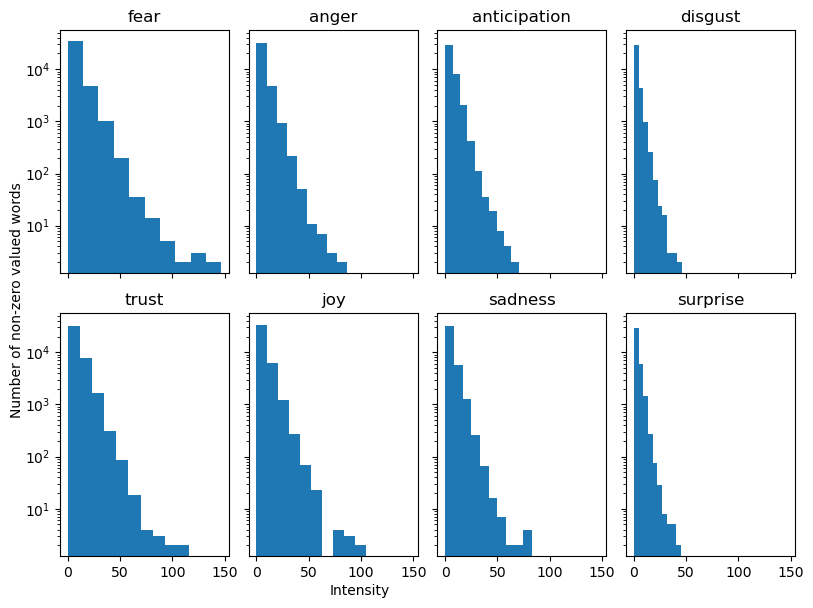

In [18]:
import matplotlib
import matplotlib.pyplot as plt
# Check the distribution of intensities for each kind of emotion in the lexicon
fig, ax = plt.subplots(2,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(1,9):
 subplt = ax[i//5,i%4]
 subplt.hist(holder[holder.columns[i-1]][holder[holder.columns[i-1]] != 0], log=True)
 subplt.set_title(holder.columns[i-1])

fig.tight_layout()

fig.text(0.4,0, "Intensity")
fig.text(0,0.3, "Number of non-zero valued words", rotation = 90)

In [15]:
for i in range(1,9):
 print('ax[{},{}]'.format(i//5,i%4))

ax[0,1]
ax[0,2]
ax[0,3]
ax[0,0]
ax[1,1]
ax[1,2]
ax[1,3]
ax[1,0]
